Class Mapping: {0: 'Marginal', 1: 'Safe', 2: 'Unsafe'}

STARTING MODEL COMPARISON

Training Logistic Regression...
Accuracy: 0.7742
Classification Report:
              precision    recall  f1-score   support

    Marginal       0.62      0.54      0.58      1002
        Safe       0.84      0.90      0.87      2613
      Unsafe       0.64      0.53      0.58       385

    accuracy                           0.77      4000
   macro avg       0.70      0.66      0.68      4000
weighted avg       0.76      0.77      0.77      4000



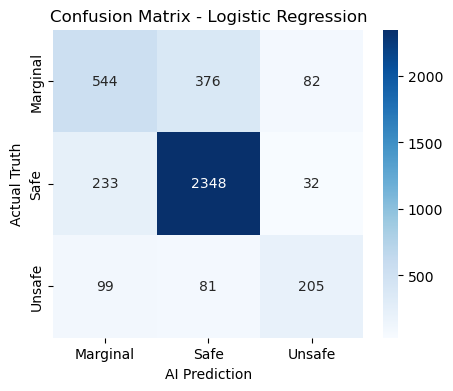


Training Random Forest...
Accuracy: 0.9915
Classification Report:
              precision    recall  f1-score   support

    Marginal       0.99      0.98      0.98      1002
        Safe       0.99      1.00      0.99      2613
      Unsafe       1.00      0.99      1.00       385

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



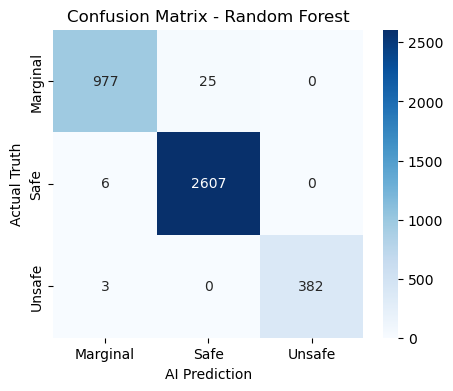


Training XGBoost...


c:\Users\Piyusha\anaconda3\envs\global-suicide-eda\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:52:01] WARNING: D:\bld\xgboost-split_1768313915774\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9880
Classification Report:
              precision    recall  f1-score   support

    Marginal       0.98      0.97      0.98      1002
        Safe       0.99      0.99      0.99      2613
      Unsafe       0.98      0.98      0.98       385

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000



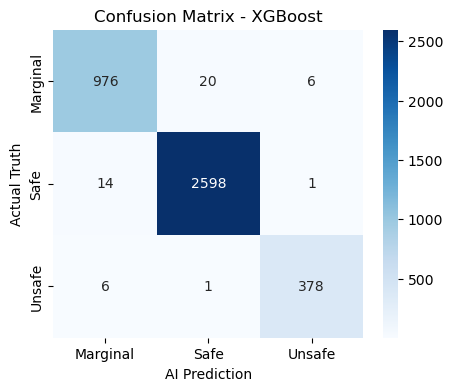


🏆 Best Performing Model: Random Forest


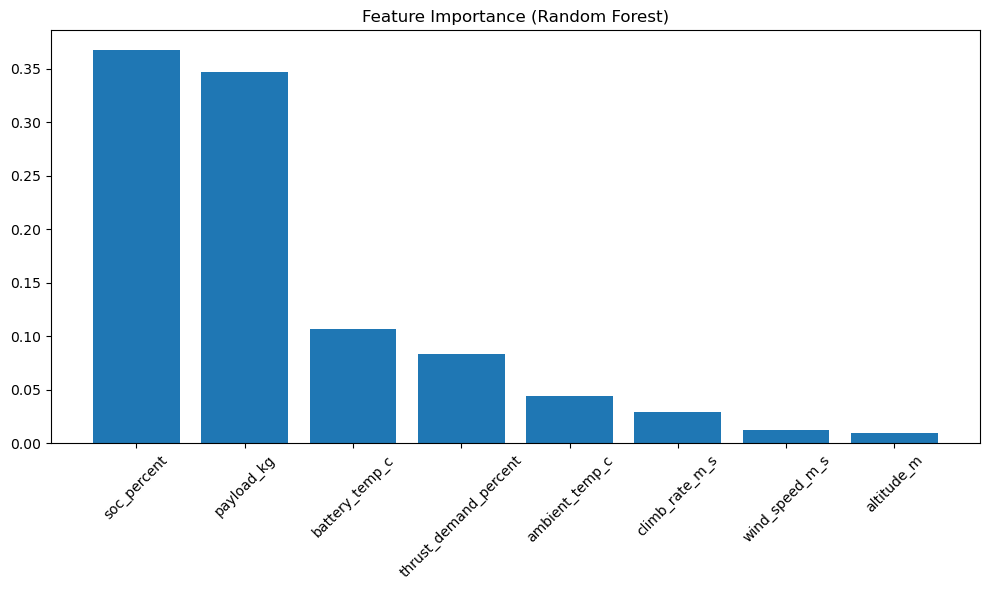

Interpretability: The chart above shows which physics parameters the AI thinks are most critical for safety.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


df = pd.read_csv('eVTOL_flight_envelope_dataset.csv')


X = df.drop('flight_status', axis=1)
y = df['flight_status']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


class_names = le.classes_
print(f"Class Mapping: {dict(zip(range(len(class_names)), class_names))}")


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


results = {}

print("\n" + "="*40)
print("STARTING MODEL COMPARISON")
print("="*40)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # metrics
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    # We explicitly map the numeric labels back to names for readability
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual Truth')
    plt.xlabel('AI Prediction')
    plt.show()


best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Performing Model: {best_model_name}")

if best_model_name in ["Random Forest", "XGBoost"]:
    model = models[best_model_name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10,6))
    plt.title(f"Feature Importance ({best_model_name})")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()
    print("Interpretability: The chart above shows which physics parameters the AI thinks are most critical for safety.")

In [4]:
import joblib

# 1. Retrain the best model on ALL available data (Train + Test) for maximum performance
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X, y_encoded) # X and y_encoded are from your previous cell

# 2. Save the model and the scaler
joblib.dump(best_model, 'urdhyuth_safety_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model saved successfully as 'urdhyuth_safety_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")

✅ Model saved successfully as 'urdhyuth_safety_model.pkl'
✅ Scaler saved as 'scaler.pkl'
